# Practice_Activity_Penguin_Classification
Hanna Wierszok


# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins


In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, f1_score, auc, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_line, geom_point, labs, geom_abline
from palmerpenguins import load_penguins

In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins["Adelie"] = penguins["species"].apply(lambda x: 1 if x == "Adelie" else 0)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0


In [5]:
penguins = penguins.dropna()

In [6]:
X = penguins[["species", "island", "bill_length_mm","bill_depth_mm", "flipper_length_mm","body_mass_g","sex","year"]]
y = penguins["Adelie"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [7]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

kNN Model K=3

In [8]:
lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn_Classifier", KNeighborsClassifier(n_neighbors=3))]
)

lr_pipeline_1.fit(X_train, y_train)
y_pred = lr_pipeline_1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[50,  0],
       [ 0, 34]])

In [9]:
# Overall accuracy
accuracy_score(y_test, y_pred)

1.0

In [10]:
# Precision
precision_score(y_test, y_pred)

1.0

In [11]:
# AUC
roc_auc_score(y_test, y_pred)

1.0

In [12]:
#F1-score
f1_score(y_test, y_pred)

1.0

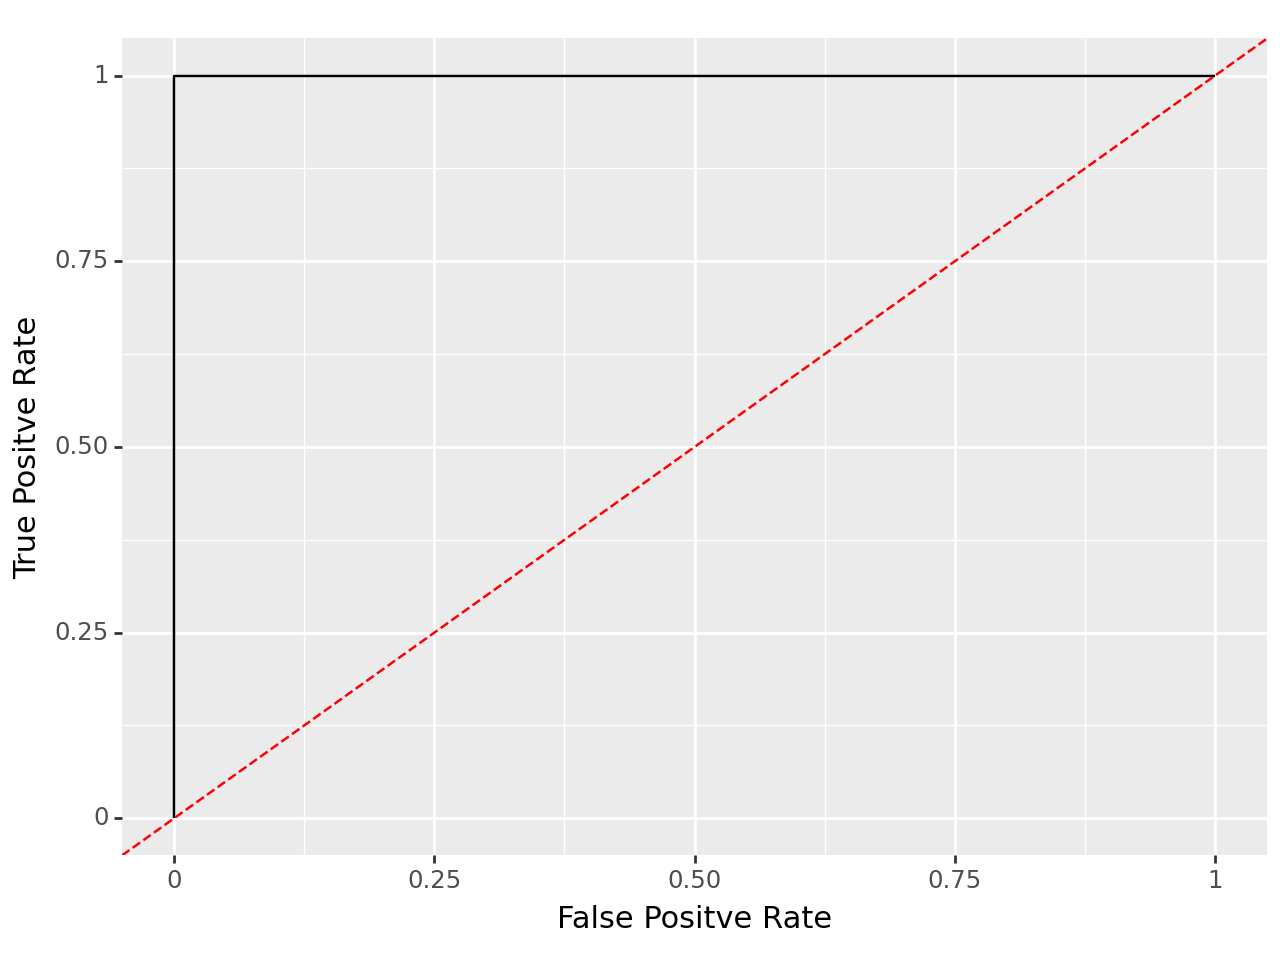

<Figure Size: (640 x 480)>

In [13]:
false_positve_rate, true_positve_rate,thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positve_rate, true_positve_rate,)
roc_table = pd.DataFrame({"False Positve Rate": false_positve_rate, "True Positve Rate": true_positve_rate})

(ggplot(roc_table,
                   aes(x="False Positve Rate",
                       y="True Positve Rate"))
            + geom_line()
            + geom_abline(slope=1, intercept=0, linetype="dashed", color="red")

)

Decision tree model 1

In [14]:
lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
  ("Decision_tree", DecisionTreeClassifier(min_samples_leaf=5,max_depth=10))]
)

lr_pipeline_3.fit(X_train, y_train)
y_pred = lr_pipeline_3.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[50,  0],
       [ 0, 34]])

In [15]:
# Overall accuracy
accuracy_score(y_test, y_pred)

1.0

In [16]:
# Precision
precision_score(y_test, y_pred)

1.0

In [17]:
# Recall
recall_score(y_test, y_pred)

1.0

In [18]:
# AUC
roc_auc_score(y_test, y_pred)

1.0

In [19]:
#F1-score
f1_score(y_test, y_pred)

1.0

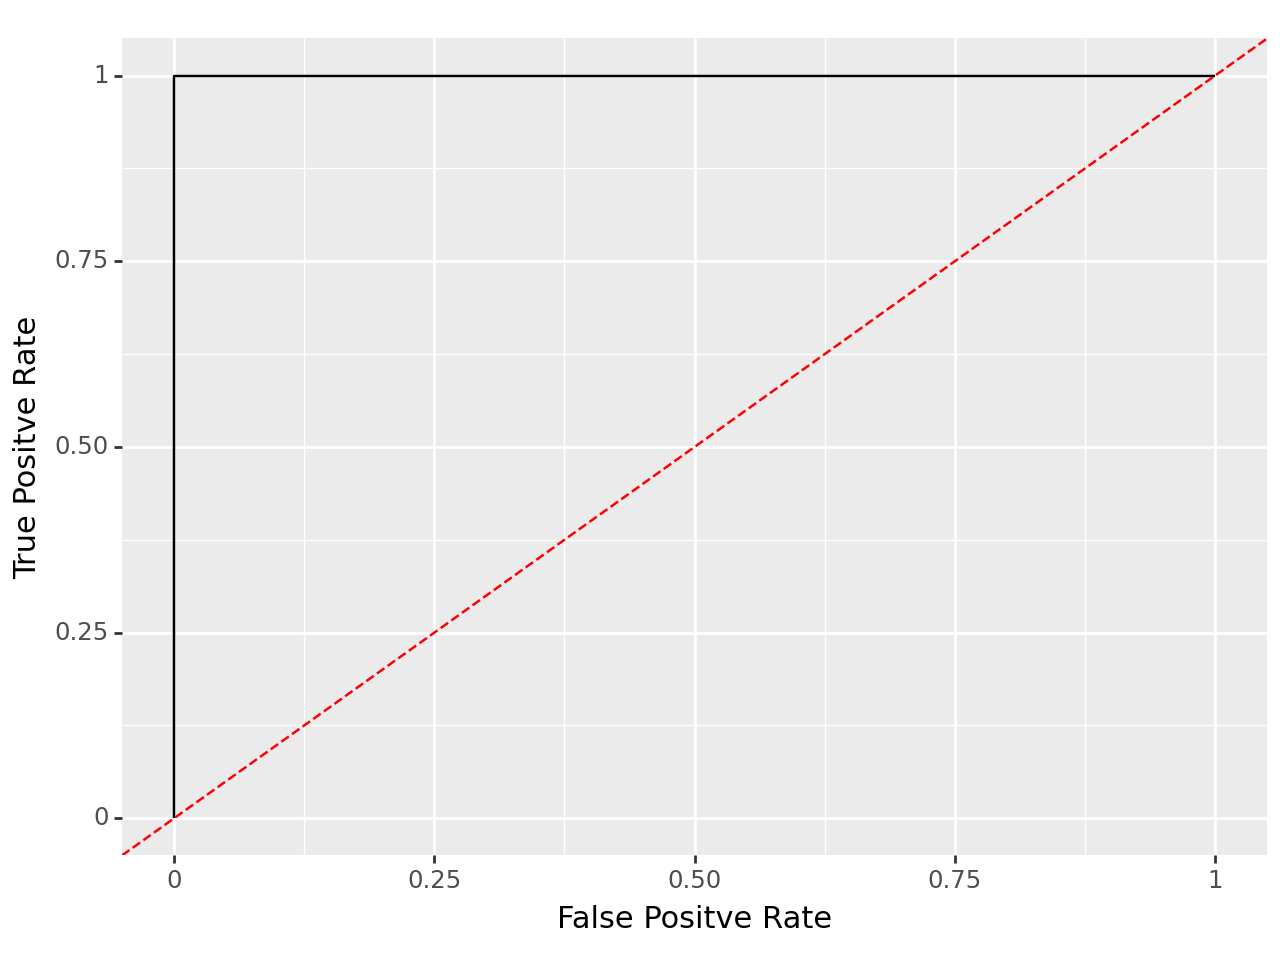

<Figure Size: (640 x 480)>

In [20]:
false_positve_rate, true_positve_rate,thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positve_rate, true_positve_rate,)
roc_table = pd.DataFrame({"False Positve Rate": false_positve_rate, "True Positve Rate": true_positve_rate})

(ggplot(roc_table,
                   aes(x="False Positve Rate",
                       y="True Positve Rate"))
            + geom_line()
            + geom_abline(slope=1, intercept=0, linetype="dashed", color="red")

)

Decision tree model 2

In [21]:
lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
  ("Decision_tree", DecisionTreeClassifier(min_samples_leaf=10,max_depth=15))]
)

lr_pipeline_4.fit(X_train, y_train)
y_pred = lr_pipeline_4.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[50,  0],
       [ 0, 34]])

In [22]:
# Overall accuracy
accuracy_score(y_test, y_pred)

1.0

In [23]:
# Precision
precision_score(y_test, y_pred)

1.0

In [24]:
# Recall
recall_score(y_test, y_pred)

1.0

In [25]:
# AUC
roc_auc_score(y_test, y_pred)

1.0

In [26]:
#F1-score
f1_score(y_test, y_pred)

1.0

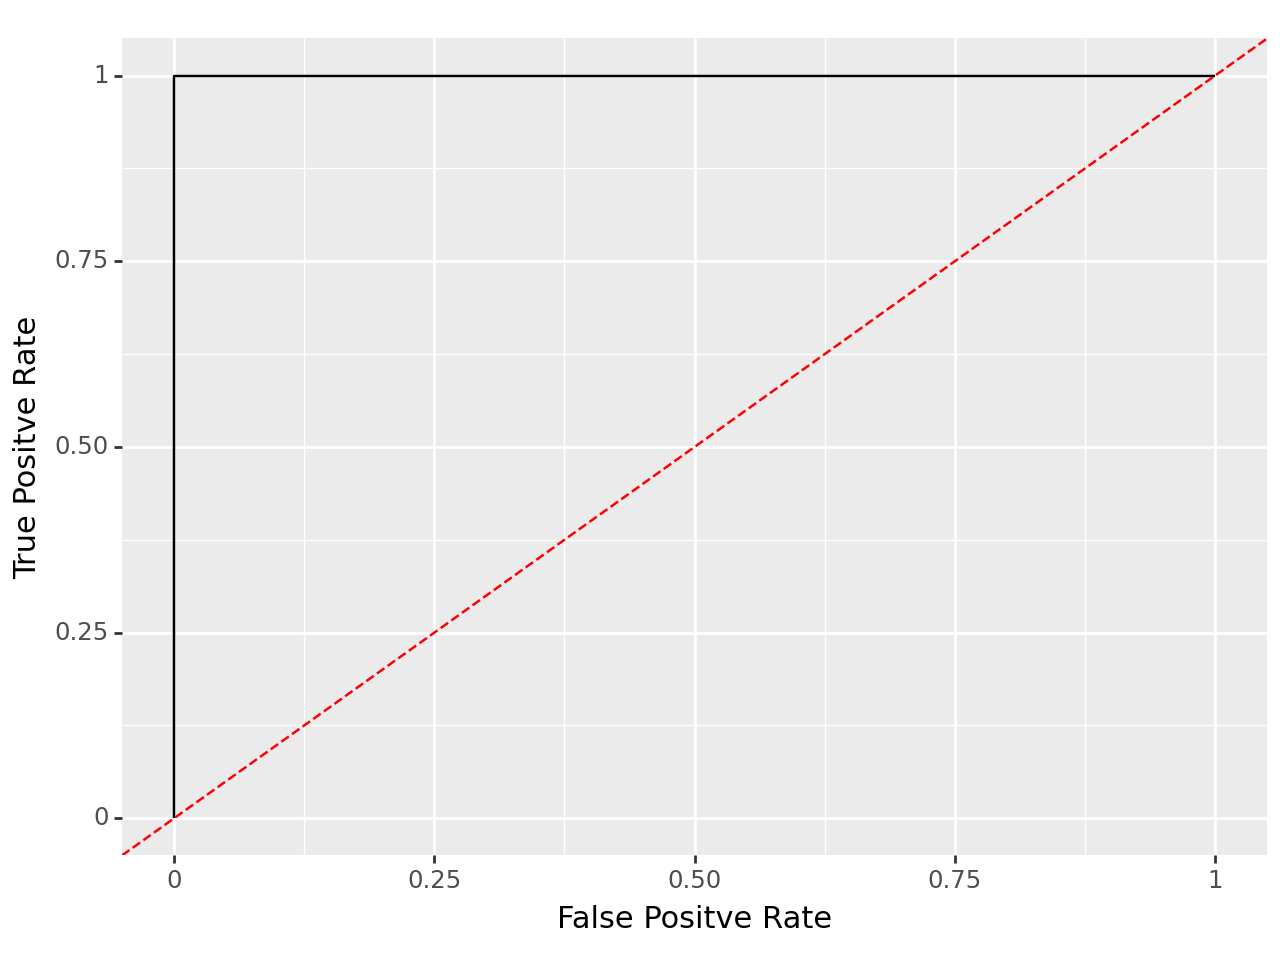

<Figure Size: (640 x 480)>

In [27]:
false_positve_rate, true_positve_rate,thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positve_rate, true_positve_rate,)
roc_table = pd.DataFrame({"False Positve Rate": false_positve_rate, "True Positve Rate": true_positve_rate})

(ggplot(roc_table,
                   aes(x="False Positve Rate",
                       y="True Positve Rate"))
            + geom_line()
            + geom_abline(slope=1, intercept=0, linetype="dashed", color="red")

)